In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
data = pd.read_csv('creditCardFraud.csv')

In [17]:
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
1,50000,1,1,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
2,500000,1,1,2,29,0,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
3,100000,2,2,2,23,0,-1,-1,0,0,...,221,-159,567,380,601,0,581,1687,1542,0
4,140000,2,3,1,28,0,0,2,0,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0


In [18]:
data.shape

(1001, 24)

In [19]:
data.isna().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   1001 non-null   int64
 1   SEX                         1001 non-null   int64
 2   EDUCATION                   1001 non-null   int64
 3   MARRIAGE                    1001 non-null   int64
 4   AGE                         1001 non-null   int64
 5   PAY_0                       1001 non-null   int64
 6   PAY_2                       1001 non-null   int64
 7   PAY_3                       1001 non-null   int64
 8   PAY_4                       1001 non-null   int64
 9   PAY_5                       1001 non-null   int64
 10  PAY_6                       1001 non-null   int64
 11  BILL_AMT1                   1001 non-null   int64
 12  BILL_AMT2                   1001 non-null   int64
 13  BILL_AMT3                   1001 non-null   int64
 14  BILL_AMT

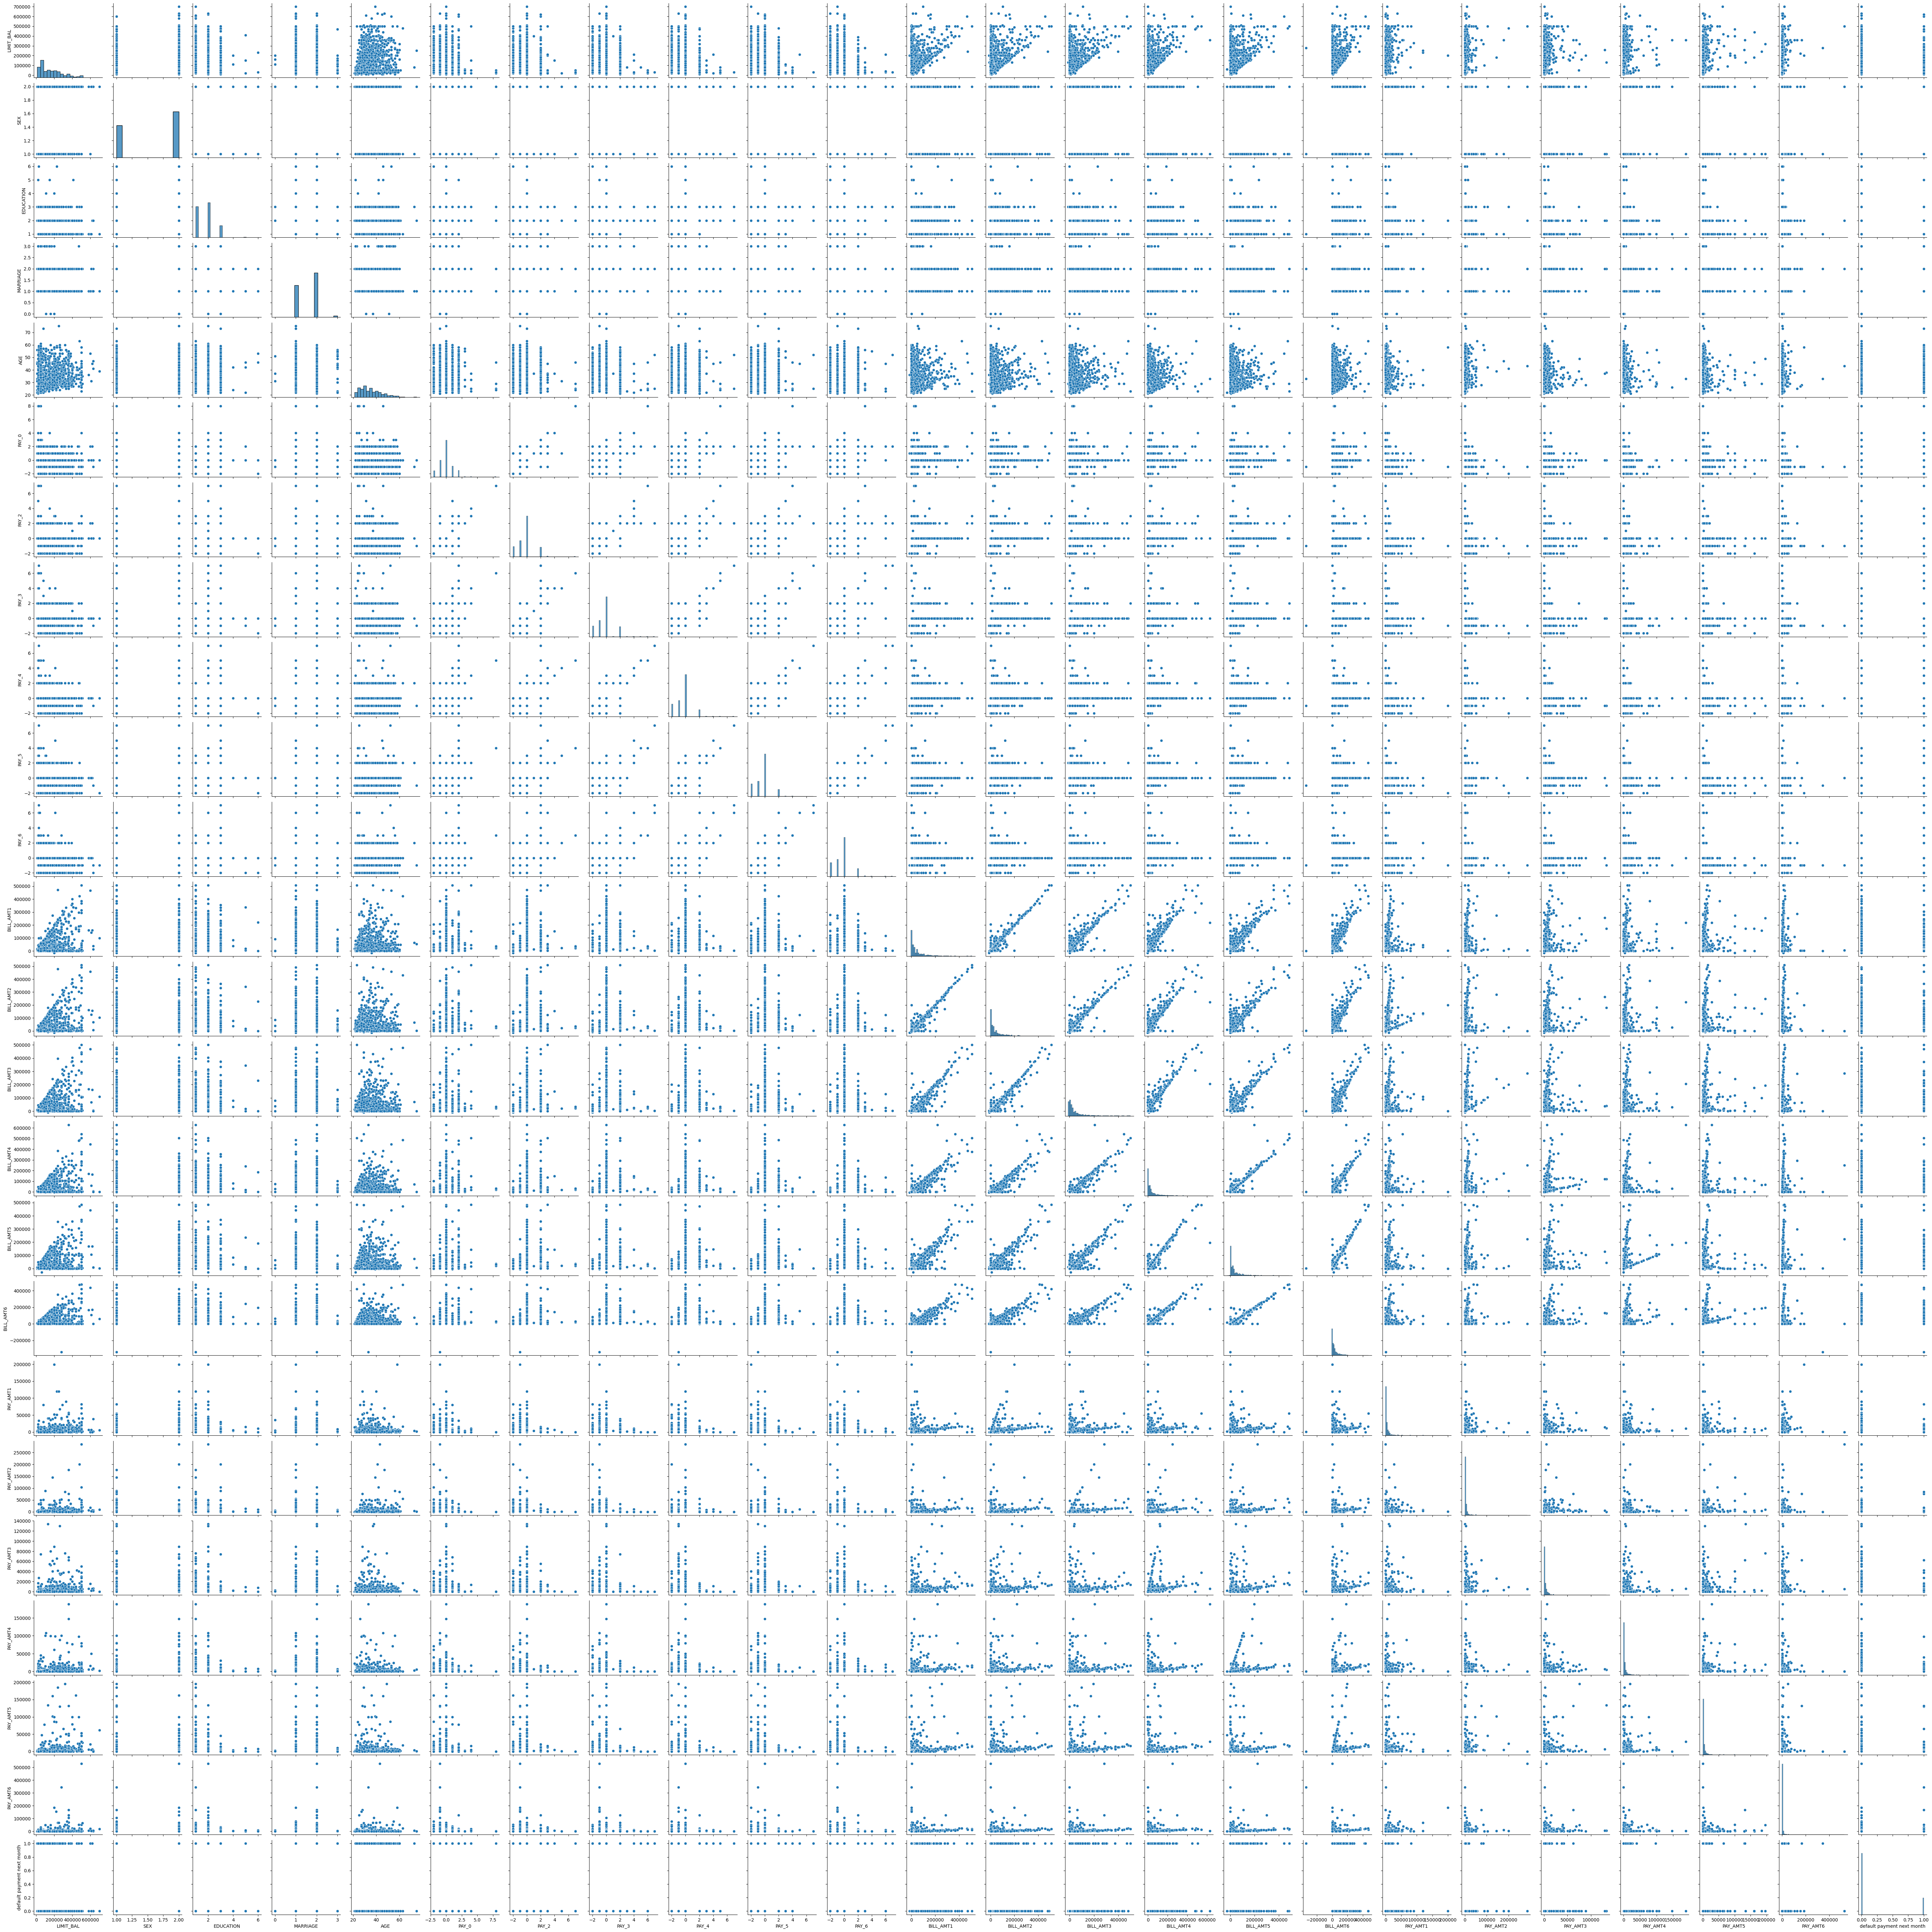

In [21]:
sns.pairplot(data)

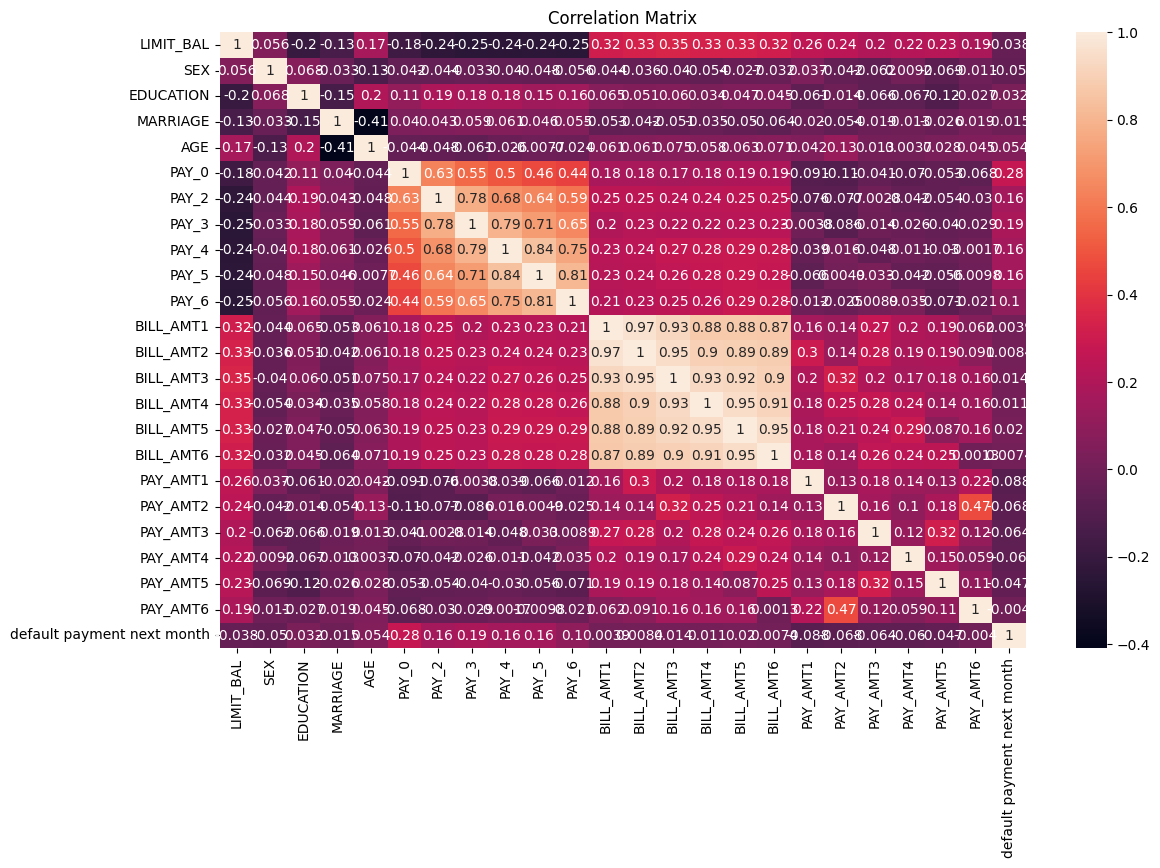

In [22]:
plt.figure(figsize=(13,8))
sns.heatmap(data.corr(),annot=True)
plt.title('Correlation Matrix')
plt.show()


In [23]:
x = data.drop('default payment next month',axis=1)
y = data['default payment next month']


In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=42)

In [25]:
from sklearn.preprocessing import  StandardScaler
train_scaler=StandardScaler()
test_scaler=StandardScaler()

In [26]:
scaled_train_data=train_scaler.fit_transform(x_train)
scaled_test_data=test_scaler.fit_transform(x_test)

In [27]:
scaled_train_df=pd.DataFrame(data=scaled_train_data, columns=x_train.columns, index=x_train.index)
scaled_test_df=pd.DataFrame(data=scaled_test_data, columns=x_test.columns, index=x_test.index)

In [28]:
scaled_train_df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
311,-0.827063,-1.187465,0.287024,0.730441,-1.282089,-0.031171,0.115654,0.105611,0.225653,0.220334,...,-0.176369,-0.360048,-0.340346,-0.309805,-0.305588,-0.184075,-0.348399,-0.294666,-0.195700,-0.177211
765,0.239455,0.842130,-1.030140,-1.151849,0.006733,-1.701941,-1.465732,-1.466817,-1.463595,-1.476489,...,-0.630462,-0.569559,-0.612888,-0.614997,-0.103300,-0.202343,-0.165886,-0.364653,-0.306803,-0.203779
630,-0.446164,-1.187465,1.604187,-1.151849,2.262170,-0.031171,0.115654,0.105611,0.225653,0.220334,...,-0.176218,-0.173591,-0.266578,-0.244778,-0.119159,-0.215453,-0.279526,-0.176838,-0.129149,0.010829
0,-0.903243,-1.187465,0.287024,-1.151849,2.369572,-0.866556,0.115654,-0.680603,0.225653,0.220334,...,-0.155442,-0.308208,-0.319868,-0.313196,-0.302945,1.718397,0.574694,0.413945,-0.268528,-0.174494
316,-0.446164,-1.187465,0.287024,0.730441,-0.637678,0.804214,1.697039,1.678039,0.225653,0.220334,...,0.065414,0.083910,0.119615,0.141737,-0.258893,-0.293788,-0.212424,-0.191632,-0.203810,-0.117521


In [29]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(scaled_train_df,y_train)
y_pred=gnb.predict(scaled_test_df)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.676737160120846

In [30]:
from sklearn.model_selection import GridSearchCV

In [31]:
param_grid = {"var_smoothing": [1e-9,0.1, 0.001, 0.5,0.05,0.01,1e-8,1e-7,1e-6,1e-10,1e-11]}
#Creating an object of the Grid Search class
grid = GridSearchCV(estimator=gnb, param_grid=param_grid, cv=5,  verbose=3)

In [49]:
#finding the best parameters
grid.fit(scaled_train_df, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


,estimator,"XGBClassifier...ree=None, ...)"
,param_grid,"{'max_depth': range(3, 11), 'n_estimators': [50, 100, ...], 'random_state': [0, 50, ...]}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,3
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'binary:logistic'


In [50]:
grid.best_estimator_

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [34]:
gnb_new=GaussianNB(var_smoothing=0.5)
pred_y_new=gnb_new.fit(scaled_train_df,y_train).predict(scaled_test_df)

In [35]:
ac_new=accuracy_score(y_test,pred_y_new)
ac_new

0.797583081570997

In [36]:
# Import required libraries
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Parameter grid for XGBoost
param_grid_xgboost = {
    "n_estimators": [50, 100, 130],
    "max_depth": range(3, 11, 1),
    "random_state": [0, 50, 100]
}

# Creating an object of the Grid Search class
grid = GridSearchCV(
    estimator=XGBClassifier(objective='binary:logistic'),
    param_grid=param_grid_xgboost,
    verbose=3,
    cv=5,
    n_jobs=-1
)

In [37]:
from xgboost import XGBClassifier

In [38]:
param_grid_xgboost = {

                "n_estimators": [50,100, 130],
                               "max_depth": range(3, 11, 1),
    "random_state":[0,50,100]


            }

# Creating an object of the Grid Search class
grid= GridSearchCV(XGBClassifier(objective='binary:logistic'),param_grid_xgboost, verbose=3,cv=5,n_jobs=-1)

In [52]:
from xgboost import XGBClassifier

In [53]:
grid.best_estimator_

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [54]:
xgb_new=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, n_estimators=50, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [55]:
pred_y_xgb_new=xgb_new.fit(scaled_train_df,y_train).predict(scaled_test_df)

In [56]:
ac_xgb_new=accuracy_score(y_test,pred_y_xgb_new)

In [45]:
ac_xgb_new

0.8126888217522659